# Import

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Reading files

In [3]:
folder = "/home/gorbunov8a/data/shell_to_shell/Rl60_N128/new_time_shift/time/"
nb = 500

file_type = "shell_to_shell_transfer_time_shift_positive_part_ite="
table = []
for iteration in list(range(nb)) :
    file = folder + file_type + "%06d" % iteration + ".table"
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_data.append(temp_array_line)  
    k = np.array(file_data[0])
    nb_of_modes = np.array(file_data[1])
    table.append(file_data[2:])
T_pos = np.array(table)
del file_data, table

file_type = "shell_to_shell_transfer_time_shift_negative_part_ite="
table = []
for iteration in list(range(nb)) :
    file = folder + file_type + "%06d" % iteration + ".table"
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_data.append(temp_array_line)  
    k = np.array(file_data[0])
    nb_of_modes = np.array(file_data[1])
    table.append(file_data[2:])
T_neg = np.array(table)
del file_data, table

In [4]:
T=T_neg + T_pos

In [5]:
T.shape

(500, 22, 22)

In [6]:
# read the spectrum
file_type = "vel_spec_kstar_ite="
nb = 500

file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
spec_table = np.array(file_data)
Ek = spec_table[:,2]
del file_data

In [7]:
k.shape

(22,)

# Parameters

In [8]:
# PARAMETERS
nu = 0.0001
pi = np.pi
Rl = 60
lmbda = 0.387 
eta = 0.025   
L=2.65  
dissipation_rate=2.24565e-06

t0=dissipation_rate**(-1.0/3.0)*L**(2.0/3.0) #large scale eddy-turnover time
spatial_scales = np.array([L, lmbda, eta])
wn_scales = 2.0*np.pi/spatial_scales

# Plot appereance

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('axes', prop_cycle=cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors)))
plt.rc('axes', labelsize=12)  
plt.rc('axes', titlesize=12)  
plt.rc('legend', fontsize=12)

# Plot spectrum

In [10]:
#compute spectra
total_transfer = np.sum(T[0,:,:], axis=0)*4.0*pi*k**2.0/nb_of_modes
dissipation_spectrum = 2.0*nu*Ek*k**2.0
flux = np.zeros(shape=k.shape[0], dtype=float) 
for ik in list(range(k.shape[0])) :
    flux[ik] = np.sum(T[0,0:ik:,ik::], axis=None)
    #flux[ik] = -np.trapz(total_transfer[0:ik:], x=k[0:ik])
    #flux[ik] = -np.sum(total_transfer[:ik:])

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(12,4))

ax[0].plot(k, Ek*k**(5.0/3.0)*dissipation_rate**(-2.0/3.0), '.-')
ax[0].set(xscale='log', yscale='log', xlabel='k', ylabel=r'$E(k) k^{5/3} \epsilon^{-2/3}$', title='Compensated spectrum'); ax[0].grid()

ax[1].plot(k, total_transfer/dissipation_rate, '.-', label=r'$T(k)$')
ax[1].plot(k, dissipation_spectrum/dissipation_rate, '.-', label=r'$D(k)$')
ax[1].plot(k, np.sum(total_transfer)*np.ones_like(k), '-', label=r'$\sum_k T(k)$')
ax[1].set(xlabel='k', ylabel=r'$T(k)/\epsilon$', title='Energy transfer and dissipation',xscale='log', yscale='linear'); ax[1].grid()
ax[1].legend()

ax[2].plot(k, flux/dissipation_rate, '.-')
ax[2].plot(k, np.ones_like(k), '-')
ax[2].set(xlabel='k', ylabel=r'$\Pi(k)/\epsilon$', title='Energy flux',xscale='log', yscale='log'); ax[2].grid()

for iax in ax :
    vertical_lines=wn_scales
    for line in vertical_lines : iax.axvline(x=line)
    ax2 = iax.twiny()
    ax2.set(xscale='log', yscale=iax.get_yscale(), xlim = iax.get_xlim())
    ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])

plt.show()

<IPython.core.display.Javascript object>

# Plot shell-to-shell energy transfer at t=0

In [12]:
norm_coef = 1.0/np.max([np.max(np.abs(T_neg[:,:,:])), np.max(np.abs(T_pos[:,:,:]))])

In [13]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(12,4),constrained_layout=True)

ax1.pcolormesh(k, k, T[0,:,:]*norm_coef, cmap='seismic',vmin=-1.0, vmax=1.0)
ax1.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log', title='Total energy transfer')
ax1.set_aspect('equal', 'datalim')

ax2.pcolormesh(k, k, T_pos[0,:,:]*norm_coef, cmap='seismic',vmin=-1.0, vmax=1.0)
ax2.set(xlabel=r'$k_B$ - receiver', xscale='log', yscale='log', title='Positive part')
ax2.set_aspect('equal', 'datalim')

im = ax3.pcolormesh(k, k, T_neg[0,:,:]*norm_coef, cmap='seismic',vmin=-1.0, vmax=1.0)
ax3.set(xlabel=r'$k_B$ - receiver', xscale='log', yscale='log', title='Negative part')
ax3.set_aspect('equal', 'datalim')
fig.colorbar(im)

# ax2 = ax.twiny()
# ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
# ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

<IPython.core.display.Javascript object>

In [14]:
# compute the fraction of backscattering
bs_fraction = np.where(T[0,:,:] < 0, T_pos[0,:,:]*norm_coef, T_neg[0,:,:]*norm_coef)
np.fill_diagonal(bs_fraction, 'nan')
fig, ax1 = plt.subplots(figsize=(6,4),constrained_layout=True)

im = ax1.pcolormesh(k, k, bs_fraction, cmap='seismic')
ax1.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log', title='Backscattering fraction')
ax1.set_aspect('equal', 'datalim')

fig.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>

# Time evolution of the matrix (total energy transfer)

In [15]:
time_vector = np.arange(T.shape[0])*0.1/t0

In [16]:
t_values = np.array([0.0, 0.05, 0.1, 0.15, 0.25, 0.33])
fig, ax = plt.subplots(nrows=2, ncols=3,constrained_layout=True, figsize=(8,5))
for i in list(range(ax.shape[0])) :
    for j in list(range(ax.shape[1])) :
        it = np.searchsorted(time_vector, t_values[(ax.shape[0]+1)*i+j])
        im = ax[i,j].pcolormesh(k, k, T[it,:,:] * norm_coef, cmap='seismic',vmin=-1.0, vmax=1.0)
        ax[i,j].set(xscale='log', yscale='log',title=r'$\Delta t$ = %2.2f' %(time_vector[it]))
        ax[i,j].set_aspect('equal', 'datalim')
        if (j == 0) :
            ax[i,j].set(ylabel=r'$k_A$ - giver')
        if (i == (ax.shape[0]-1)) :
            ax[i,j].set(xlabel=r'$k_B$ - receiver')
        if ((j==ax.shape[0])) :
            fig.colorbar(im, ax=ax[i,j])
fig.suptitle('Time shifted energy transfer matrix') 
plt.show()

<IPython.core.display.Javascript object>

# Wavenumber dependence

In [17]:
diag_center = T.diagonal(offset=0, axis1=1, axis2=2) #green
diag_plus = T.diagonal(offset=1, axis1=1, axis2=2)   #red
diag_minus = T.diagonal(offset=-1, axis1=1, axis2=2) #blue

fig, ax = plt.subplots(nrows=2, ncols=3,constrained_layout=True, figsize=(10,5))
for i in list(range(ax.shape[0])) :
    for j in list(range(ax.shape[1])) :
        it = np.searchsorted(time_vector, t_values[(ax.shape[0]+1)*i+j])
        ax[i,j].plot(k, diag_center[it,:], 'g.-', label='Diagonal')
        ax[i,j].plot(k[1:], diag_plus[it,:], 'r.-', label='Subdiagonal')
        ax[i,j].plot(k[:-1], diag_minus[it,:], 'b.-', label='Superdiagonal')
        if (j == 0) :
            ax[i,j].set(ylabel='T')
        if (i == (ax.shape[0]-1)) :
            ax[i,j].set(xlabel='k')
        ax[i,j].set(title=r'$\Delta t$ = %2.2f' %(time_vector[it])); ax[i,j].grid()
        #ax[i,j].set(ylim=[-0.5,0.3])
        ax[i,j].set(xscale='log')
        if ((i==0) and (j==ax.shape[0])) :
            ax[i,j].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Dependence of the diagonals on wavenumber') 
plt.show()

<IPython.core.display.Javascript object>

In [18]:
# fig, ax = plt.subplots(constrained_layout=True, figsize=(5,3))
# ax.plot(time_vector, k[np.argmax(diag_plus, axis=1)], 'r-')
# ax.plot(time_vector, k[np.argmin(diag_minus, axis=1)], 'b-')
# ax.plot(time_vector, k[np.argmin(diag_center, axis=1)], 'g-')
# ax.set(xlabel=r'$\Delta t$', ylabel='k')
# plt.show()

# Time dependence

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,constrained_layout=True, figsize=(12,4))
for ik in list(range(k.shape[0]-1))[11::] :
    pow_k = 1.0
    horiz_scale = k[ik]**pow_k
    ax1.plot(time_vector*horiz_scale, T[:, ik+1, ik] / np.max(np.abs(T[:, ik+1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax2.plot(time_vector*horiz_scale, T[:, ik-1, ik] / np.max(np.abs(T[:, ik-1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax3.plot(time_vector*horiz_scale, T[:, ik, ik] / np.max(np.abs(T[:, ik, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
xlimits=np.array([0,0.33])*10**pow_k
ax1.set(title='A = B+1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, ylabel=r'$T^{AB}$', xlim=xlimits); ax1.grid()
ax2.set(title='A = B-1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax2.grid()
ax3.set(title='A = B', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle(r'Time dependence for the total energy transport, normalization by max$|T^{AB}(\Delta t)|$') 
plt.show()

<IPython.core.display.Javascript object>

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,constrained_layout=True, figsize=(12,4))
for ik in list(range(k.shape[0]-1))[11::] :
    pow_k = 1
    horiz_scale = k[ik]**pow_k
    ax1.plot(time_vector*horiz_scale, T_pos[:, ik+1, ik] / np.max(np.abs(T_pos[:, ik+1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax2.plot(time_vector*horiz_scale, T_pos[:, ik-1, ik] / np.max(np.abs(T_pos[:, ik-1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax3.plot(time_vector*horiz_scale, T_pos[:, ik, ik] / np.max(np.abs(T_pos[:, ik, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
#     norm_index = 0
#     ax1.plot(time_vector*horiz_scale, T_pos[:, ik+1, ik] / T_pos[norm_index, ik+1, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
#     ax2.plot(time_vector*horiz_scale, T_pos[:, ik-1, ik] / T_pos[norm_index, ik-1, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
#     ax3.plot(time_vector*horiz_scale, T_pos[:, ik, ik] / T_pos[norm_index, ik, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
xlimits=np.array([0,0.33])*10**pow_k
ax1.set(title='A = B+1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, ylabel=r'$T^{AB}$', xlim=xlimits); ax1.grid()
ax2.set(title='A = B-1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax2.grid()
ax3.set(title='A = B', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle(r'Time dependence for the positive part, normalization by $T^{AB}(\Delta t=0)$') 
plt.show()

<IPython.core.display.Javascript object>

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,constrained_layout=True, figsize=(12,4))
for ik in list(range(k.shape[0]-1))[11::] :
    pow_k = 1
    horiz_scale = k[ik]**pow_k
    ax1.plot(time_vector*horiz_scale, T_neg[:, ik+1, ik] / np.max(np.abs(T_neg[:, ik+1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax2.plot(time_vector*horiz_scale, T_neg[:, ik-1, ik] / np.max(np.abs(T_neg[:, ik-1, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
    ax3.plot(time_vector*horiz_scale, T_neg[:, ik, ik] / np.max(np.abs(T_neg[:, ik, ik])), '-', label='k=%2.f' % (k[ik]), lw=2)
#     norm_index = 0
#     ax1.plot(time_vector*horiz_scale, T_neg[:, ik+1, ik] / T_neg[norm_index, ik+1, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
#     ax2.plot(time_vector*horiz_scale, T_neg[:, ik-1, ik] / T_neg[norm_index, ik-1, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
#     ax3.plot(time_vector*horiz_scale, T_neg[:, ik, ik] / T_neg[norm_index, ik, ik], '-', label='k=%2.f' % (k[ik]), lw=2)
xlimits=np.array([0,0.33])*10**pow_k
ax1.set(title='A = B+1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, ylabel=r'$T^{AB}$', xlim=xlimits); ax1.grid()
ax2.set(title='A = B-1', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax2.grid()
ax3.set(title='A = B', xlabel=r'$\Delta t k^{%2.1f}$' % pow_k, xlim=xlimits); ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle(r'Time dependence for the negative part, normalization by $T^{AB}(\Delta t=0)$') 
plt.show()

<IPython.core.display.Javascript object>

# Time dependence of the total transfer

In [22]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(6,4))
total_transfer = np.sum(T[:,0::,:], axis=1)
for ik in list(range(k.shape[0]-1))[10::] :
    normalization = 1.0/total_transfer[0, ik]
    normalization = 1.0
    #normalization = 1.0/(Ek[ik]*k[ik]**(2.0))
    ax.plot(time_vector*k[ik]**(0.0), total_transfer[:, ik]*normalization, '-', label='k=%2.f' % (k[ik]))
ax.set(xlabel='t', ylabel=r'$T_{total}$'); ax.grid()
ax.set(yscale='linear')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<IPython.core.display.Javascript object>

# Time dependence of the total flux

In [23]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(6,4))
flux = np.zeros(shape=[time_vector.shape[0], k.shape[0]], dtype=float) 
for ik in list(range(k.shape[0]))[10::] :
    for it in list(range(time_vector.shape[0])) :
        flux[it,ik] = np.sum(T[it,0:ik:,ik::], axis=None)
    normalization = 1.0/flux[0,ik]
    #normalization = 1.0
    ax.plot(time_vector*(k[ik]**(0.0)), flux[:,ik]*normalization, '-', label='k=%2.f' % (k[ik]))
ax.set(xlabel='t', ylabel=r'$\Pi(t,k)$', title=r'$\Pi(t,k) = \sum_{k^\prime=0}^k T(t,k^\prime)$'); ax.grid()
ax.set(xscale='linear', yscale='log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

# Forcing band

<IPython.core.display.Javascript object>


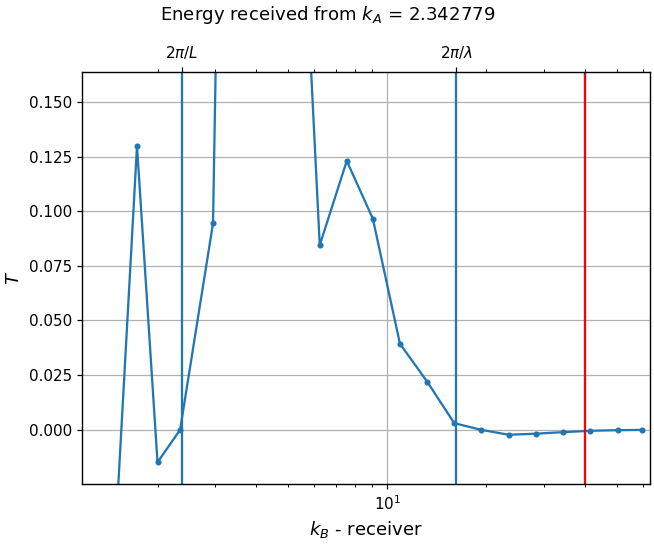

In [28]:
fig, ax = plt.subplots(figsize=(6,5),constrained_layout=True)
ikf = 4
ax.plot(k, T[0,ikf, :]/np.max(np.abs(T[0,:,:])),  '.-')
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$T$', xscale='log', yscale='linear'); ax.grid()
fig.suptitle(r'Energy received from $k_A$ = %f' % k[ikf]) 
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale=ax.get_yscale(), xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])

ax.axvline(x=40, color='red')
ax.axvline(x=80, color='red')
plt.show()